<a href="https://colab.research.google.com/github/Schlam/RNN-sentiment-classifier/blob/master/tesla_data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install vaderSentiment
!pip install tensorflow==2.1.0
from google.colab import files
files.upload()

In [0]:
from multiprocessing.pool import ThreadPool
import csv
import os

# Load in data from every post on reddit containing "tesla" in the past 48 days
data = []
for i in range(1, 49):
    with open('tesla-031820-{}.csv'.format(i),'r') as f:
        reader = csv.reader(f) 
        next(reader)
        with ThreadPool(16) as p:
            data.extend(p.map(list, reader))
            

columns = ['created_utc', 'selftext', 'title', 'score', 'subreddit']

print("Total # of posts: ", len(data)-1)
print("\nColumns: ",columns)
print("\nExample: ",data[0])
print("\nData points with nonempy text columns: ",len([d for d in data if d[1]!='']))

Total # of posts:  21640

Columns:  ['created_utc', 'selftext', 'title', 'score', 'subreddit']

Example:  ['1553171217', '', 'Tesla testing new ‘self-driving’ vehicle w/ robotic chauffeur', '17758', 'wallstreetbets']

Data points with nonempy text columns:  10129


In [0]:
import re

# List for all text data from posts
texts = [re.sub('\d|http\S+|www\S+', ' ',str(d[1])) for d in data if d[1]!='']

print(texts[0][:64],"...")

I'm doing a BoS playthrough and after completing Automotron I de ...


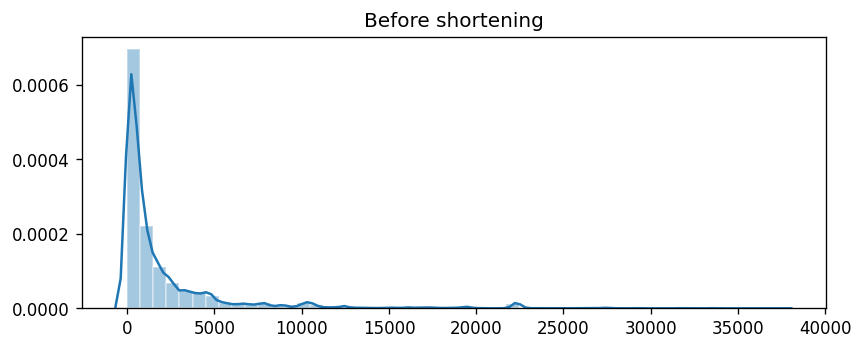

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize = (8, 3), dpi=120)
plt.title("Before shortening")
sns.set(color_codes=True)
sns.distplot([len(t) for t in texts])
plt.show()

In [0]:
print("Percentage of posts less than 10000 chars long: \n")
len([t for t in texts if len(t) <= 10000])/len(texts)

Percentage of posts less than 10000 chars long: 



0.9556718333497878

In [0]:
# Reduce runtime by shortening text length
texts = [t[:10000] for t in texts]

In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from datetime import datetime
analyzer = SentimentIntensityAnalyzer()

get_attributes = lambda doc: (doc["pos"], doc["neu"], doc["neg"], doc["compound"])

def get_sentiment(docs):
    """
    Analyze sentiment of each reddit post using vaderSentiment
    """
    results = []
    with ThreadPool(4) as p:
        results.extend(p.map(lambda x: get_attributes(analyzer.polarity_scores(x)), docs))
    return results
    
a = datetime.now()    
sentiment = get_sentiment(texts)
b = datetime.now()
timedelta = b-a
print("Analyzed sentiment of {} texts in {} seconds:".format(len(texts), timedelta.seconds))

Analyzed sentiment of 10129 texts in 104 seconds:


In [0]:
pos_sent = np.array([t[0] for t in text_sentiment])
scores = [int(d[3]) for d in data if d[1]!='']

df = pd.DataFrame(tuple(zip(scores, pos_sent)), columns = ["score", "pos"])
sns.jointplot(x="score", y="pos", data=df, kind="kde")

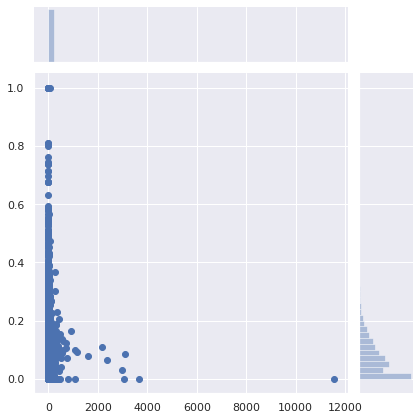

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

pos = np.array([t[0] for t in sentiment])
neg = np.array([t[0] for t in sentiment])
neu = np.array([t[0] for t in sentiment])
scores = [int(d[3]) for d in data if d[1]!='']

sns.jointplot(x=scores, y=pos)
#sns.jointplot(x=scores, y=neu)
#sns.jointplot(x=scores, y=neg)

len(data)